In [2]:
# Objectives
# After completing this lab you will be able to:

# Handle missing values
# Correct data formatting
# Standardize and normalize data

In [3]:
# Table of Contents
# Identify and handle missing values
# Identify missing values
# Deal with missing values
# Correct data format
# Data standardization
# Data normalization (centering/scaling)
# Binning
# Indicator variable

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt


In [5]:
# from pyodide.http import pyfetch

# async def download(url, filename):
#     response = await pyfetch(url)
#     if response.status == 200:
#         with open(filename, "wb") as f:
#             f.write(await response.bytes())

In [6]:
file_name = "usedcars.csv"
# Try reading with different encoding
try:
    df = pd.read_csv(file_name, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(file_name, encoding='latin1')  # or encoding='ISO-8859-1'

# Now df should contain the DataFrame with the data from the CSV file

In [7]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df.columns = headers
df.head(0)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [8]:
missing_data=df.isnull()
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df.replace("?",np.NaN,inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [10]:
for column in missing_data.columns.values.tolist():
    # print(column)
    print(missing_data[column].value_counts())
    print("")

symboling
False    204
Name: count, dtype: int64

normalized-losses
False    204
Name: count, dtype: int64

make
False    204
Name: count, dtype: int64

fuel-type
False    204
Name: count, dtype: int64

aspiration
False    204
Name: count, dtype: int64

num-of-doors
False    204
Name: count, dtype: int64

body-style
False    204
Name: count, dtype: int64

drive-wheels
False    204
Name: count, dtype: int64

engine-location
False    204
Name: count, dtype: int64

wheel-base
False    204
Name: count, dtype: int64

length
False    204
Name: count, dtype: int64

width
False    204
Name: count, dtype: int64

height
False    204
Name: count, dtype: int64

curb-weight
False    204
Name: count, dtype: int64

engine-type
False    204
Name: count, dtype: int64

num-of-cylinders
False    204
Name: count, dtype: int64

engine-size
False    204
Name: count, dtype: int64

fuel-system
False    204
Name: count, dtype: int64

bore
False    204
Name: count, dtype: int64

stroke
False    204
Name: count,

In [11]:
# Calculate the mean value for the "normalized-losses" column 

avg_normalized=df["normalized-losses"].astype("float").mean(axis=0)
print("avg_normalized:",avg_normalized)

avg_normalized: 122.0


In [12]:
# Replace "NaN" with mean value in "normalized-losses" column
df["normalized-losses"].replace(np.nan,avg_normalized,inplace=True)

C:\Users\Jazib Khan\AppData\Local\Temp\ipykernel_10628\2703206138.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["normalized-losses"].replace(np.nan,avg_normalized,inplace=True)


In [13]:
# Calculate the mean value for the "bore" column
avg_bore1 = df["bore"].astype("float").mean(axis=0)
df["bore"].replace(np.NaN, avg_bore1, inplace=True)


C:\Users\Jazib Khan\AppData\Local\Temp\ipykernel_10628\3539539536.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["bore"].replace(np.NaN, avg_bore1, inplace=True)


In [14]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [15]:
avg_stroke= df["stroke"].astype("float").mean(axis=0)
df["stroke"].replace(np.NaN,avg_stroke,inplace=True)

In [16]:
avg_horsepower = df["horsepower"].astype("float").mean(axis=0)
df["horsepower"].replace(np.NaN,avg_horsepower,inplace=True)

In [17]:
avg_peak = df["peak-rpm"].astype("float").mean(axis=0)
df["peak-rpm"].replace(np.NaN,avg_peak,inplace=True)

In [18]:
# To see which values are present in a particular column, we can use the ".value_counts()" method:
df["num-of-doors"].value_counts()

num-of-doors
four    114
two      88
Name: count, dtype: int64

In [20]:
# You can see that four doors is the most common type. We can also use the ".idxmax()" method to 
# calculate the most common type automatically:

df["num-of-doors"].value_counts().idxmax()

'four'

In [21]:
# The replacement procedure is very similar to what you have seen previously:
df["num-of-doors"].replace(np.NaN,"four",inplace=True)

In [22]:
# Finally, drop all rows that do not have price data:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"],axis=0,inplace=True)


In [23]:
# reset index, because we droped two rows
df.reset_index(drop=True,inplace=True)

In [24]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


Now, you have a data set with no missing values.

### Correct data format
<b>We are almost there!</b>
<p>The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).</p>

In Pandas, you use:
<p><b>.dtype()</b> to check the data type</p>
<p><b>.astype()</b> to change the data type</p>

In [26]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<p>As you can see above, some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. For example, the numerical values 'bore' and 'stroke' describe the engines, so you should expect them to be of the type 'float' or 'int'; however, they are shown as type 'object'. You have to convert data types into a proper format for each column using the "astype()" method.</p> 


In [30]:
df[["bore","stroke"]] = df[["bore","stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float") 

In [31]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

<b>Wonderful!</b>

Now you finally obtained the cleansed data set with no missing values and with all data in its proper format.


## Data Standardization
<p>
You usually collect data from different agencies in different formats.
(Data standardization is also a term for a particular type of data normalization where you subtract the mean and divide by the standard deviation.)
</p>
    
<b>What is standardization?</b>
<p>Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.
</p>

<b>Example</b>
<p>Transform mpg to L/100km:</p>
<p>In your data set, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume you are developing an application in a country that accepts the fuel consumption with L/100km standard.</p>
<p>You will need to apply <b>data transformation</b> to transform mpg into L/100km.</p>


<p>Use this formula for unit conversion:<p>
L/100km = 235 / mpg
<p>You can do many mathematical operations directly using Pandas.</p>


In [34]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19,25,15250.0


In [37]:
df["city-mpg"] = 235/ df["city-mpg"]
df.rename(columns={"city-mpg":"city-L/100KM"},inplace=True)

In [38]:
df["highway-mpg"] = 235 / df["highway-mpg"]
df.rename(columns={"highway-mpg":"highway-L-/100KM"},inplace=True)

In [39]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100KM,highway-L-/100KM,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500.0,12.368421,9.400000,15250.0


## Data Normalization

<b>Why normalization?</b>
<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include 
<ol>
    <li>scaling the variable so the variable average is 0</li>
    <li>scaling the variable so the variance is 1</li> 
    <li>scaling the variable so the variable values range from 0 to 1</li>
</ol>
</p>

<b>Example</b>
<p>To demonstrate normalization, say you want to scale the columns "length", "width" and "height".</p>
<p><b>Target:</b> normalize those variables so their value ranges from 0 to 1</p>
<p><b>Approach:</b> replace the original value by (original value)/(maximum value)</p>


In [40]:
# replace (original value) by (original value)/(maximum value)
df["length"] = df["length"]/df["length"].max()
df["width"] = df["width"]/df["width"].max()
df["height"] = df["height"]/df["height"].max()


## Binning
<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.
</p>

<b>Example: </b>
<p>In your data set, "horsepower" is a real valued variable ranging from 48 to 288 and it has 59 unique values. What if you only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? You can rearrange them into three ‘bins' to simplify analysis.</p>

<p>Use the Pandas method 'cut' to segment the 'horsepower' column into 3 bins.</p>


<h3>Example of Binning Data In Pandas</h3>

 Convert data to correct format:


In [41]:
df["horsepower"] = df["horsepower"].astype(int,copy=True)

Plot the histogram of horsepower to see the distribution of horsepower.


Text(0.5, 1.0, 'Horsepower bins')

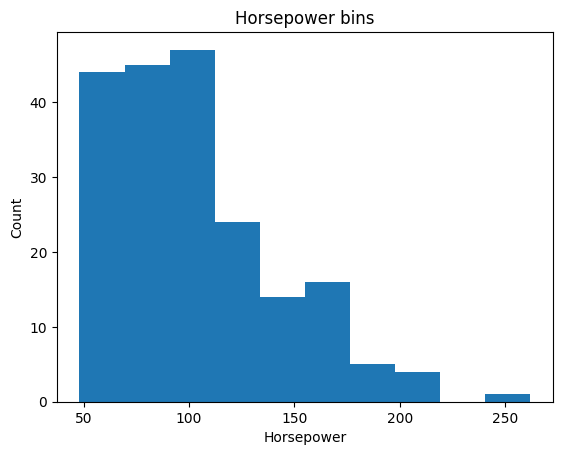

In [42]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

plt.pyplot.hist(df["horsepower"])


plt.pyplot.xlabel("Horsepower")
plt.pyplot.ylabel("Count")
plt.pyplot.title("Horsepower bins")






<p>Find 3 bins of equal size bandwidth by using Numpy's <code>linspace(start_value, end_value, numbers_generated</code> function.</p>
<p>Since you want to include the minimum value of horsepower, set start_value = min(df["horsepower"]).</p>
<p>Since you want to include the maximum value of horsepower, set end_value = max(df["horsepower"]).</p>
<p>Since you are building 3 bins of equal length, you need 4 dividers, so numbers_generated = 4.</p>

Build a bin array with a minimum value to a maximum value by using the bandwidth calculated above. The values will determine when one bin ends and another begins.


In [44]:
bins = np.linspace(min(df["horsepower"]),max(df["horsepower"]),4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [43]:
group_labels = ["Low","Medium","High"]

In [46]:
df["horsepower-binned"] = pd.cut(df["horsepower"],bins,labels=group_labels,include_lowest=True)
df[["horsepower","horsepower-binned"]].head(10)

,horsepower,horsepower-binned
0,111,Low
1,154,Medium
2,102,Low
3,115,Low
4,110,Low
5,110,Low
6,110,Low
7,140,Medium
8,101,Low
9,101,Low


See the number of vehicles in each bin:


In [47]:
df["horsepower-binned"].value_counts()

horsepower-binned
Low       152
Medium     43
High        5
Name: count, dtype: int64

Text(0.5, 1.0, 'Horsepower-bins')

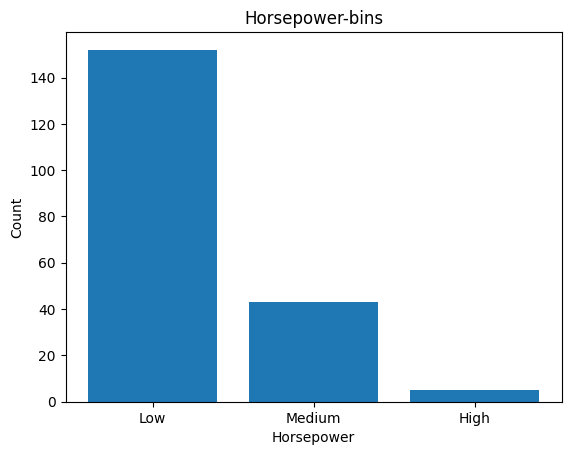

In [48]:
pyplot.bar(group_labels,df["horsepower-binned"].value_counts())
plt.pyplot.xlabel("Horsepower")
plt.pyplot.ylabel("Count")
plt.pyplot.title("Horsepower-bins")


<h3>Bins Visualization</h3>
Normally, you use a histogram to visualize the distribution of bins we created above. 


Text(0.5, 1.0, 'horsepower bins')

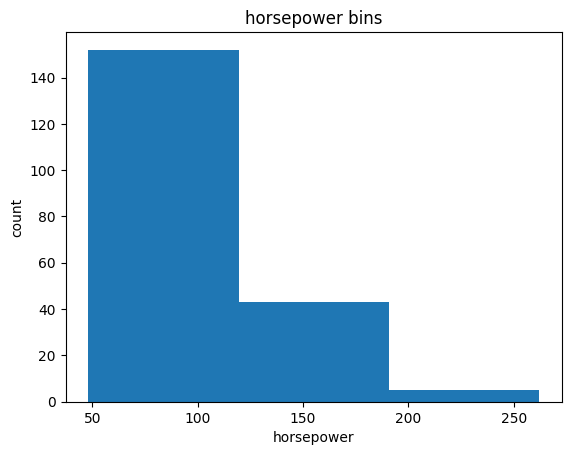

In [49]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

## Indicator Variable
<b>What is an indicator variable?</b>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>

<b>Why use indicator variables?</b>
<p>
    You use indicator variables so you can use categorical variables for regression analysis in the later modules.
</p>
<b>Example</b>
<p>
    The column "fuel-type" has two unique values: "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, you can convert "fuel-type" to indicator variables.
</p>

<p>
    Use the Panda method 'get_dummies' to assign numerical values to different categories of fuel type. 
</p>


In [50]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-L/100KM',
       'highway-L-/100KM', 'price', 'horsepower-binned'],
      dtype='object')

In [54]:
dummies_data = pd.get_dummies(df['fuel-type'])
dummies_data.head()

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [55]:
dummies_data.rename(columns={'diesel':'fuel-type-diesel','gas':'fuel-type-gas'},inplace=True)
dummies_data.head()

,fuel-type-diesel,fuel-type-gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [56]:
# merge data frame "df" and "dummy_variable_1" 
df=pd.concat([df,dummies_data],axis=1)

In [57]:
# drop original column "fuel-type" from "df"
df.drop('fuel-type',axis=1,inplace=True)

In [58]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-L/100KM,highway-L-/100KM,price,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0,Low,False,True
1,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0,Medium,False,True
2,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0,Low,False,True
3,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0,Low,False,True
4,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,...,3.40,8.5,110,5500.0,12.368421,9.400000,15250.0,Low,False,True


In [59]:
dummies_aspiration = pd.get_dummies(df["aspiration"])
dummies_aspiration.head()

,std,turbo
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [60]:
df=pd.concat([df,dummies_aspiration],axis=1)


In [62]:
df.drop("aspiration",axis=1,inplace=True)
df.head(10)

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-L/100KM,highway-L-/100KM,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,std,turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,11.190476,8.703704,16500.0,Low,False,True,True,False
1,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154,5000.0,12.368421,9.038462,16500.0,Medium,False,True,True,False
2,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102,5500.0,9.791667,7.833333,13950.0,Low,False,True,True,False
3,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115,5500.0,13.055556,10.681818,17450.0,Low,False,True,True,False
4,2,122,audi,two,sedan,fwd,front,99.8,0.851994,0.920833,...,110,5500.0,12.368421,9.400000,15250.0,Low,False,True,True,False
5,1,158,audi,four,sedan,fwd,front,105.8,0.925997,0.991667,...,110,5500.0,12.368421,9.400000,17710.0,Low,False,True,True,False
6,1,122,audi,four,wagon,fwd,front,105.8,0.925997,0.991667,...,110,5500.0,12.368421,9.400000,18920.0,Low,False,True,True,False
7,1,158,audi,four,sedan,fwd,front,105.8,0.925997,0.991667,...,140,5500.0,13.823529,11.750000,23875.0,Medium,False,True,False,True
8,2,192,bmw,two,sedan,rwd,front,101.2,0.849592,0.900000,...,101,5800.0,10.217391,8.103448,16430.0,Low,False,True,True,False
9,0,192,bmw,four,sedan,rwd,front,101.2,0.849592,0.900000,...,101,5800.0,10.217391,8.103448,16925.0,Low,False,True,True,False


In [64]:
df.to_csv("cleaned_used_cars_data.csv")